In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import *
from scipy import optimize
import time

Bestimmung der Normierungskonstante $N$:

\begin{align*}
    f(x) =& N \frac{x^3}{e^x-1} \\
    1 =& \int_0^\inf f(x) \\
    1 =& N \int_0^\inf \frac{x^3}{e^x-1}\\
    1 =& N \cdot \frac{\pi^4}{15} \\
    N =& \frac{15}{\pi^4} \\
    \Rightarrow  f(x) =& \frac{15}{\pi^4} \frac{x^3}{e^x-1}
\end{align*}

In [2]:
def f(x):
    return (15*x**3)/((np.pi)**4*(np.exp(x)-1))

Bestimmung der Extrema:

\begin{align}
    f'(x) &= 0 \\
    f'(x) &= \frac{15}{\pi^4}\frac{(e^x(x-3)+3)\cdot x^2}{(e^x-1)^2} = 0
\end{align}

Das ist nicht analytisch lösbar, also mit scipy.optimize.brentq Nullstelle suchen. 

In [3]:
def f_abl(x):
    return (15*(np.exp(x)*(x-3)+3)*x**2)/(np.pi**4*(np.exp(x)-1)**2)

In [4]:
a=optimize.brentq(f_abl,-1,1)
b=optimize.brentq(f_abl,2,3)
print('Extrema 1: ',a)
print('Extrema 2: ',b)

Extrema 1:  -0.0002502474468460993
Extrema 2:  2.8214393721220787


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


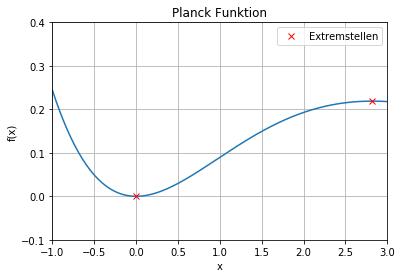

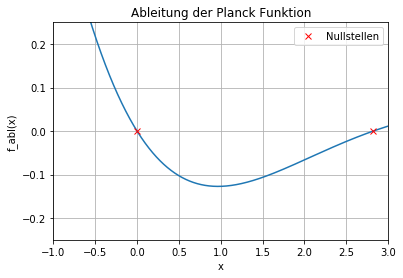

In [5]:
x = np.linspace(-5,5,10000)

plt.plot(x,f(x))
plt.grid()
plt.title('Planck Funktion')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(a,f(a),'rx',label='Extremstellen')
plt.legend()
plt.plot(b,f(b),'rx')
plt.ylim(-0.1,0.4)
plt.xlim(-1,3)
plt.show()

plt.plot(x,f_abl(x))
plt.plot(a,f_abl(a),'rx',label='Nullstellen')
plt.plot(b,f_abl(b),'rx')
plt.title('Ableitung der Planck Funktion')
plt.xlabel('x')
plt.ylabel('f_abl(x)')
plt.ylim(-0.25,0.25)
plt.xlim(-1,3)
plt.grid()
plt.legend()
plt.show()

$\Rightarrow$ Bei $x = 2.82144$ ist ein Maximum und bei $x = -0.00025$ ein Minimum

In [6]:
y_max = f(b)
x_cut = 20
print('Maximum f(x_max) =',y_max)

Maximum f(x_max) = 0.218886470091


In [7]:
rnd_planck = []
i_verworfen = 0
start = time.time()
for k in range(10**5):
    v = np.random.uniform(0,x_cut)
    u = np.random.uniform(0,y_max)
    while(u>f(v)):
        v = np.random.uniform(0,x_cut)
        u = np.random.uniform(0,y_max)
        i_verworfen += 1 #Wenn man in der Schleife ist wurde die erste Zahl verworfen und für
        #jeden weiteren Durchlauf wird eine weitere verworfen
    rnd_planck.append(v)
end = time.time()

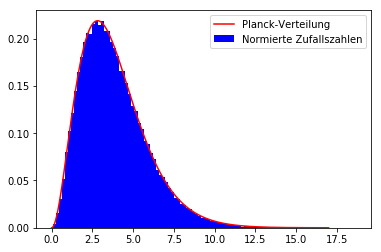

In [8]:
y = np.linspace(10**-5,17,100000)

plt.hist(rnd_planck,color='b',bins=100,normed=True,label='Normierte Zufallszahlen')
plt.plot(y,f(y),'r',label='Planck-Verteilung')
plt.legend()
plt.show()

# b)

In [9]:
def g(x,a,y_m):
    if(x <= a):
        return y_m
    if(x > a):
        return (200*(15/(np.pi**4))*x**(-0.1)*np.exp(-x**(0.9)))

In [10]:
def g_schnitt(x):
    return ((200*(15/(np.pi**4))*x**(-0.1)*np.exp(-x**(0.9)))-0.218886470091)

In [11]:
x_s = optimize.brentq(g_schnitt,5,6) #Schnittpunkt der beiden Majoranten
i_verworfen_b = 0
start_b = time.time()
rnd_planck_b = []
for k in range(10**5):
    v = np.random.uniform(0,x_cut)
    u = np.random.uniform(0,g(v,x_s,y_max))
    while(u > f(v)):
        v = np.random.uniform(0,x_cut)
        u = np.random.uniform(0,g(v,x_s,y_max))
        i_verworfen_b += 1
    rnd_planck_b.append(v)
end_b = time.time()

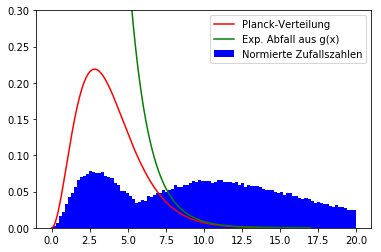

In [12]:
plt.hist(rnd_planck_b,color='b',bins=100,normed=True,label='Normierte Zufallszahlen')
plt.plot(y,f(y),'r',label='Planck-Verteilung')
plt.plot(y,(200*(15/(np.pi**4))*y**(-0.1)*np.exp(-y**(0.9))),'g',label='Exp. Abfall aus g(x)')
plt.legend()
plt.ylim(0,0.3)
plt.show()

# c)

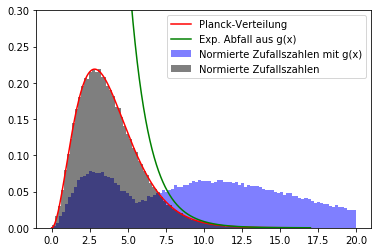

In [13]:
plt.hist(rnd_planck_b,color='b',bins=100,normed=True,label='Normierte Zufallszahlen mit g(x)', alpha=0.5)
plt.hist(rnd_planck,color='k',bins=100,normed=True,label='Normierte Zufallszahlen', alpha=0.5)
plt.plot(y,f(y),'r',label='Planck-Verteilung')
plt.plot(y,(200*(15/(np.pi**4))*y**(-0.1)*np.exp(-y**(0.9))),'g',label='Exp. Abfall aus g(x)')
plt.legend()
plt.ylim(0,0.3)
plt.show()

In [16]:
print('Verworfene Zahlen aus a):',i_verworfen)
print('Zeit für a):', end-start)
print('Verworfene Zahlen aus b):',i_verworfen_b)

Verworfene Zahlen aus a): 337629


NameError: name 'end' is not defined